In [232]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from IPython.display import display


In [233]:
import os
import pandas as pd

def save_model_results(result_dict, save_csv_path):
    df_new = pd.DataFrame([result_dict])  #  Fix: wrap in list

    if os.path.exists(save_csv_path):
        df_existing = pd.read_csv(save_csv_path)
        df_combined = pd.concat([df_existing, df_new], ignore_index=True)
    else:
        df_combined = df_new

    df_combined.to_csv(save_csv_path, index=False)
    print(f"✅ Appended and saved to {save_csv_path}")


In [234]:
train_df = pd.read_csv(r'D:\Personal projects\House prices advanced Regression\train.csv')
test_df=pd.read_csv(r"D:\Personal projects\House prices advanced Regression\test.csv")
with open(r"D:\Personal projects\House prices advanced Regression\data_description.txt",'r') as file: 
    data_description = file.read()

In [235]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [236]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [237]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [238]:
# Step 1: Identify Numerical Features
train_df.select_dtypes(include=['int64','float64']).columns
numerical_features = train_df.select_dtypes(include=['int64','float64']).drop(columns=['Id','SalePrice']).columns

In [239]:
print(numerical_features)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [240]:
# checking for missing values in our data 
train_df[numerical_features].isnull().sum().sort_values(ascending=False).head(15)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
WoodDeckSF         0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
MSSubClass         0
HalfBath           0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
dtype: int64

In [241]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(),inplace=True)
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(),inplace=True)
train_df['GarageYrBlt'].fillna(train_df['MasVnrArea'].median(),inplace=True)

In [242]:
# checking for missing values in our data 
train_df[numerical_features].isnull().sum().sort_values(ascending=False).head(15)

MSSubClass       0
LotFrontage      0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
dtype: int64

In [243]:
# scaling of df 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(train_df[numerical_features])


In [244]:
x_scaled_df = pd.DataFrame(x_scaled,columns=numerical_features)
x_scaled_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.296026,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.236495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.291616,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.285002,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.289412,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [245]:
y=np.log1p(train_df['SalePrice'])

In [246]:

# performing a train test split 
from sklearn.model_selection import train_test_split 
x_train,x_val,y_train,y_val =train_test_split(x_scaled,y,test_size=0.2,random_state=42)


In [247]:
## designing basic model, alpha 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
model = Sequential([
    Dense(128,activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
model.summary()

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,105 (59.00 KB)

 Trainable params: 15,105 (59.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 127.6760 - mae: 11.1821 - val_loss: 25.7233 - val_mae: 4.7200
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.8799 - mae: 3.6590 - val_loss: 6.1466 - val_mae: 2.0423
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4960 - mae: 2.1797 - val_loss: 3.2295 - val_mae: 1.4138
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9404 - mae: 1.9163 - val_loss: 2.4424 - val_mae: 1.2159
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6441 - mae: 1.7381 - val_loss: 2.1682 - val_mae: 1.1525
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7324 - mae: 1.6460 - val_loss: 2.0359 - val_mae: 1.1184
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5449 - mae: 1.6429 - val_loss: 1.8772 - val_mae: 1.0682
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0458 - mae: 1.5660 - val_loss: 1.7962 - val_mae: 1.0471
Epoch 9/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

,model,log_mse,log_rmse,log_mae,val_mse_d,val_rmse_d,val_mae_d,epochs_run
0,alpha,0.060443,0.245851,0.17212,4.019799e+09,63401.885491,32543.465834,123


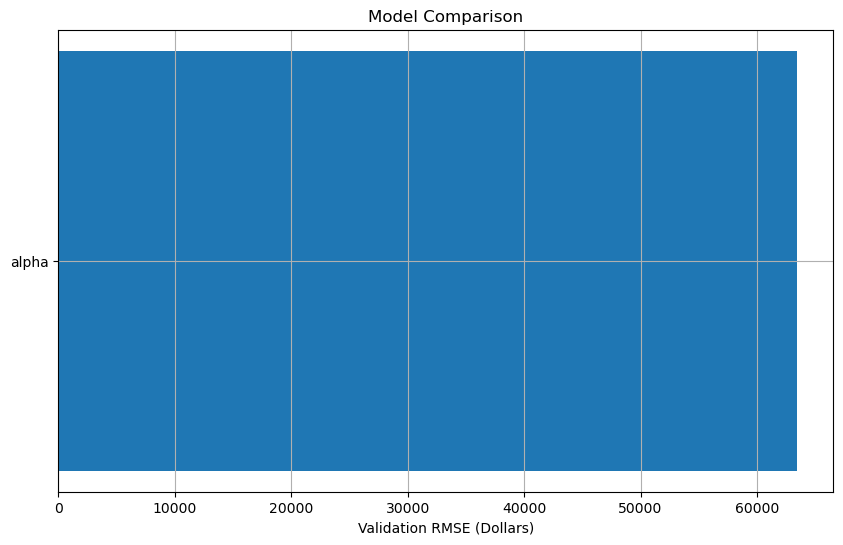

In [248]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# 1. Define logging function
def log_model_results(
    model_name,
    log_mse, log_rmse, log_mae,
    val_mse_d, val_rmse_d, val_mae_d,
    epochs_run,
    results_path="model_results.csv"
):
    result = {
        "model": model_name,
        "log_mse": log_mse,
        "log_rmse": log_rmse,
        "log_mae": log_mae,
        "val_mse_d": val_mse_d,
        "val_rmse_d": val_rmse_d,
        "val_mae_d": val_mae_d,
        "epochs_run": epochs_run
    }

    if os.path.exists(results_path):
        df = pd.read_csv(results_path)
    else:
        df = pd.DataFrame()

    df = pd.concat([df, pd.DataFrame([result])], ignore_index=True)
    df.drop_duplicates(subset=["model", "epochs_run"], keep='last', inplace=True)  # optional
    df.to_csv(results_path, index=False)


# 2. Setup early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# 3. Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print(f"Epochs run: {len(history.history['loss'])}")

# 4. Evaluate
val_loss, val_mae = model.evaluate(x_val, y_val, verbose=1)
print(f'Validation loss : {val_loss}')
print(f'Validation MAE : {val_mae}')

# 5. Predict and calculate metrics
y_pred_log = model.predict(x_val).squeeze()
y_val_log = y_val.squeeze()

# --- Log-space metrics ---
log_mse = mean_squared_error(y_val_log, y_pred_log)
log_rmse = np.sqrt(log_mse)
log_mae = mean_absolute_error(y_val_log, y_pred_log)

# --- Convert back to dollar space ---
y_val_d = np.expm1(y_val_log)
y_pred_d = np.expm1(y_pred_log)

val_mse_d = mean_squared_error(y_val_d, y_pred_d)
val_rmse_d = np.sqrt(val_mse_d)
val_mae_d = mean_absolute_error(y_val_d, y_pred_d)

# 6. Print metrics
print("\n[NN_Log_Model]  (lower is better)")
print(f"log_mse: {log_mse:.6f} | log_rmse: {log_rmse:.6f} | log_mae: {log_mae:.6f}")
print(f"val_mse_dollars: {val_mse_d:.2f} | val_rmse_dollars: {val_rmse_d:.2f} | val_mae_dollars: {val_mae_d:.2f}")

# 7. Log model results to CSV
log_model_results(
    model_name="alpha",  # Change this name per model
    log_mse=log_mse,
    log_rmse=log_rmse,
    log_mae=log_mae,
    val_mse_d=val_mse_d,
    val_rmse_d=val_rmse_d,
    val_mae_d=val_mae_d,
    epochs_run=len(history.history['loss'])
)

# 8. View all results
df = pd.read_csv("model_results.csv")
display(df)

# 9. Optional: plot model performance
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values("val_rmse_d", ascending=True)
plt.barh(df_sorted["model"], df_sorted["val_rmse_d"])
plt.xlabel("Validation RMSE (Dollars)")
plt.title("Model Comparison")
plt.grid(True)
plt.show()


In [249]:
# renaming for model v2 with more sophisticated layers 

In [250]:
X_train_v2 = x_train
y_train_v2 = y_train
X_val_v2 = x_val
y_val_v2 = y_val

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 148.1906 - mae: 12.1261 - val_loss: 140.4724 - val_mae: 11.8422 - learning_rate: 3.0000e-04
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 136.7568 - mae: 11.6532 - val_loss: 137.7000 - val_mae: 11.7250 - learning_rate: 3.0000e-04
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129.2444 - mae: 11.3302 - val_loss: 132.3567 - val_mae: 11.4959 - learning_rate: 3.0000e-04
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.9859 - mae: 10.9584 - val_loss: 126.8740 - val_mae: 11.2546 - learning_rate: 3.0000e-04
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 112.1025 - mae: 10.5402 - val_loss: 119.8552 - val_mae: 10.9369 - learning_rate: 3.0000e-04
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103.7207 - mae: 10.1392 - val_loss: 111.6874 - val_mae: 10.5549 - learning_rate: 3.0000e-04
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.0083 - mae: 9.7544 - val_loss: 

,model,log_mse,log_rmse,log_mae,val_mse_d,val_rmse_d,val_mae_d,epochs_run
0,alpha,0.060443,0.245851,0.172120,4.019799e+09,63401.885491,32543.465834,123.0
1,bravo_nn_v2,80.655566,8.980844,8.960853,2.144134e+10,146428.632659,122436.656787,NaN


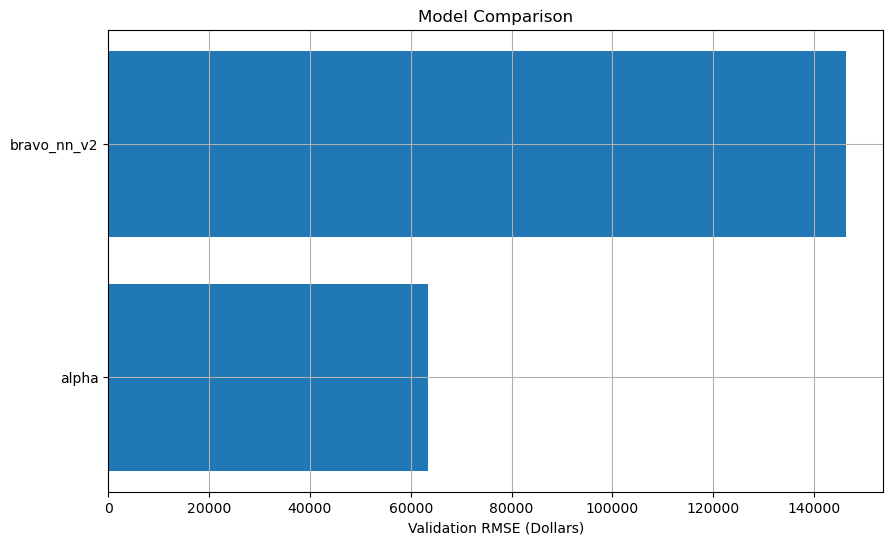

In [251]:
# building my nn_v2 model, BRAVO  : 
from tensorflow.keras import Sequential , Input 
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization , Activation 
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
tf.random.set_seed(42)
model_nn_v2 = Sequential([
    Input(shape=(X_train_v2.shape[1],)),
    Dense(256,kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2), 
    
    Dense(128,kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2), 
    Dense(64,kernel_regularizer=l2(1e-4)), 
    BatchNormalization(), 
    Activation('relu'),
    Dropout(0.2),
    Dense(1)
])

# compile
model_nn_v2.compile(
    optimizer=Adam(learning_rate=3e-4), 
    loss='mse',
    metrics=['mae']
)

# earlystopping callback
early_stop = EarlyStopping( 
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# reduce LR callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-6,
)

# training
history = model_nn_v2.fit(
    X_train_v2.astype('float64'), y_train_v2.astype('float64'),
    validation_data=(X_val_v2.astype('float64'), y_val_v2.astype('float64')),
    epochs=300,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# evaluation phase 
val_loss, val_mae = model_nn_v2.evaluate(
    X_val_v2.astype('float64'), y_val_v2.astype('float64'),
    verbose=1
)
print(f"Validation MSE: {val_loss:.4f}")
print(f"Validation MAE (log units): {val_mae:.4f}")
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# 1. Define reusable result-logging function
def log_model_results(
    model_name,
    log_mse, log_rmse, log_mae,
    val_mse_d, val_rmse_d, val_mae_d,
    epochs_run=None,
    results_path="model_results.csv"
):
    result = {
        "model": model_name,
        "log_mse": log_mse,
        "log_rmse": log_rmse,
        "log_mae": log_mae,
        "val_mse_d": val_mse_d,
        "val_rmse_d": val_rmse_d,
        "val_mae_d": val_mae_d,
        "epochs_run": epochs_run
    }

    if os.path.exists(results_path):
        df = pd.read_csv(results_path)
    else:
        df = pd.DataFrame()

    df = pd.concat([df, pd.DataFrame([result])], ignore_index=True)
    df.drop_duplicates(subset=["model", "epochs_run"], keep='last', inplace=True)
    df.to_csv(results_path, index=False)


# ### Begin BRAVO model evaluation ###
# Predict (still in log space)
y_pred_log = model_nn_v2.predict(X_val_v2.astype("float64")).squeeze()
y_val_log = np.log1p(y_val_v2.astype("float64").squeeze())

# Metrics in log-space
log_mse = mean_squared_error(y_val_log, y_pred_log)
log_rmse = np.sqrt(log_mse)
log_mae = mean_absolute_error(y_val_log, y_pred_log)

#  Clip predictions to avoid overflow
y_pred_log_clipped = np.clip(y_pred_log, a_min=None, a_max=15)
y_val_log_clipped = np.clip(y_val_log, a_min=None, a_max=15)

# Convert to dollars
y_val_d = np.expm1(y_val_log_clipped)
y_pred_d = np.expm1(y_pred_log_clipped)

# Final checks
assert np.all(np.isfinite(y_val_d)), "y_val_d contains invalid values!"
assert np.all(np.isfinite(y_pred_d)), "y_pred_d contains invalid values!"

# Metrics in dollar space
val_mse_d = mean_squared_error(y_val_d, y_pred_d)
val_rmse_d = np.sqrt(val_mse_d)
val_mae_d = mean_absolute_error(y_val_d, y_pred_d)

# Display metrics
print("\n[BRAVO MODEL - nn_v2 log] (lower is better)")
print(f"log_mse: {log_mse:.6f} | log_rmse: {log_rmse:.6f} | log_mae: {log_mae:.6f}")
print(f"val_mse_dollars: {val_mse_d:.2f} | val_rmse_dollars: {val_rmse_d:.2f} | val_mae_dollars: {val_mae_d:.2f}")

# Log results
log_model_results(
    model_name="bravo_nn_v2",  # Unique identifier
    log_mse=log_mse,
    log_rmse=log_rmse,
    log_mae=log_mae,
    val_mse_d=val_mse_d,
    val_rmse_d=val_rmse_d,
    val_mae_d=val_mae_d,
    epochs_run=None  # No training loop in this block
)

# View results
df = pd.read_csv("model_results.csv")
display(df)

# Optional: Plot model comparison
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values("val_rmse_d", ascending=True)
plt.barh(df_sorted["model"], df_sorted["val_rmse_d"])
plt.xlabel("Validation RMSE (Dollars)")
plt.title("Model Comparison")
plt.grid(True)
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

[CHARLIE MODEL - pipeline_nn_log] (lower is better)
log_mse: 89.560105 | log_rmse: 9.463620 | log_mae: 9.457250
val_mse_dollars: 39097482180.27 | val_rmse_dollars: 197730.83 | val_mae_dollars: 179475.49


C:\Users\parsa\AppData\Local\Temp\ipykernel_22744\820060473.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([result])], ignore_index=True)


,model,log_mse,log_rmse,log_mae,val_mse_d,val_rmse_d,val_mae_d,epochs_run
0,alpha,0.060443,0.245851,0.172120,4.019799e+09,63401.885491,32543.465834,123.0
1,bravo_nn_v2,80.655566,8.980844,8.960853,2.144134e+10,146428.632659,122436.656787,NaN
2,charlie_pipeline_nn_log,89.560105,9.463620,9.457250,3.909748e+10,197730.832650,179475.490654,NaN


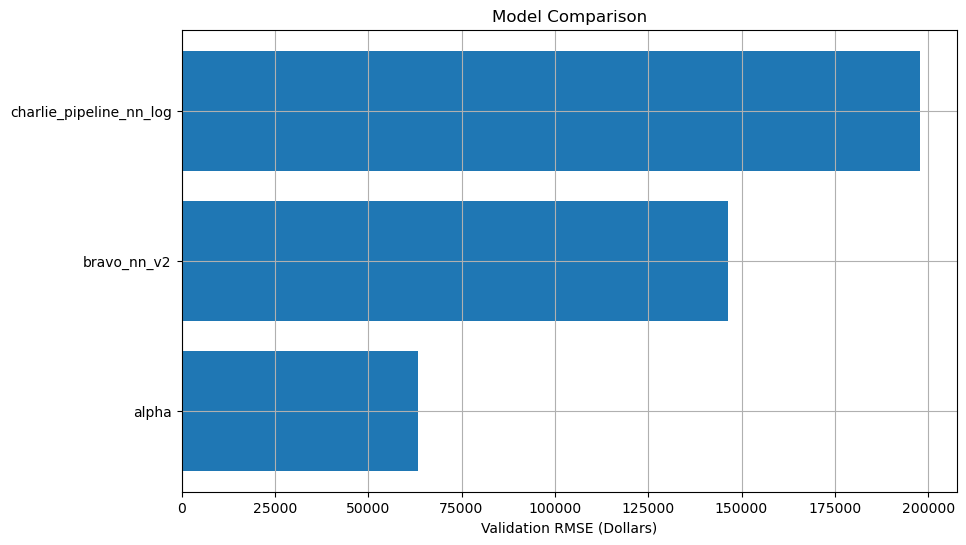

In [252]:
## charlie model with same basics as of bravo 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# 1. Define result logging function (if not already defined)
def log_model_results(
    model_name,
    log_mse, log_rmse, log_mae,
    val_mse_d, val_rmse_d, val_mae_d,
    epochs_run=None,
    results_path="model_results.csv"
):
    result = {
        "model": model_name,
        "log_mse": log_mse,
        "log_rmse": log_rmse,
        "log_mae": log_mae,
        "val_mse_d": val_mse_d,
        "val_rmse_d": val_rmse_d,
        "val_mae_d": val_mae_d,
        "epochs_run": epochs_run
    }

    if os.path.exists(results_path):
        df = pd.read_csv(results_path)
    else:
        df = pd.DataFrame()

    df = pd.concat([df, pd.DataFrame([result])], ignore_index=True)
    df.drop_duplicates(subset=["model", "epochs_run"], keep='last', inplace=True)
    df.to_csv(results_path, index=False)


# ### Begin CHARLIE model evaluation ###

# 2. Predict on validation set
y_pred_log = model.predict(x_val).squeeze()

# 3. Log-transform the ground truth
y_val_log = np.log1p(y_val)

# 4. Metrics in log-space
log_mse = mean_squared_error(y_val_log, y_pred_log)
log_rmse = np.sqrt(log_mse)
log_mae = mean_absolute_error(y_val_log, y_pred_log)

# 5. Clip to prevent overflow
y_pred_log_clipped = np.clip(y_pred_log, a_max=15, a_min=None)
y_val_log_clipped = np.clip(y_val_log, a_max=15, a_min=None)

# 6. Convert back to dollar space
y_val_d = np.expm1(y_val_log_clipped)
y_pred_d = np.expm1(y_pred_log_clipped)

# 7. Validate values
assert np.all(np.isfinite(y_val_d)), "y_val_d has invalid values!"
assert np.all(np.isfinite(y_pred_d)), "y_pred_d has invalid values!"

# 8. Dollar-space metrics
val_mse_d = mean_squared_error(y_val_d, y_pred_d)
val_rmse_d = np.sqrt(val_mse_d)
val_mae_d = mean_absolute_error(y_val_d, y_pred_d)

# 9. Print results
print("\n[CHARLIE MODEL - pipeline_nn_log] (lower is better)")
print(f"log_mse: {log_mse:.6f} | log_rmse: {log_rmse:.6f} | log_mae: {log_mae:.6f}")
print(f"val_mse_dollars: {val_mse_d:.2f} | val_rmse_dollars: {val_rmse_d:.2f} | val_mae_dollars: {val_mae_d:.2f}")

# 10. Log results to CSV
log_model_results(
    model_name="charlie_pipeline_nn_log",
    log_mse=log_mse,
    log_rmse=log_rmse,
    log_mae=log_mae,
    val_mse_d=val_mse_d,
    val_rmse_d=val_rmse_d,
    val_mae_d=val_mae_d,
    epochs_run=None  # Optional
)

# 11. View all results
df = pd.read_csv("model_results.csv")
display(df)

# 12. Plot model comparison
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values("val_rmse_d", ascending=True)
plt.barh(df_sorted["model"], df_sorted["val_rmse_d"])
plt.xlabel("Validation RMSE (Dollars)")
plt.title("Model Comparison")
plt.grid(True)
plt.show()


⚠️ Skipped log1p — targets already appear to be log-scaled.
Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3783 - mae: 0.4967 - val_loss: 0.2205 - val_mae: 0.4173
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3828 - mae: 0.4927 - val_loss: 0.0593 - val_mae: 0.1712
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3633 - mae: 0.4801 - val_loss: 0.0787 - val_mae: 0.2129
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3396 - mae: 0.4561 - val_loss: 0.1970 - val_mae: 0.3904
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3271 - mae: 0.4488 - val_loss: 0.0539 - val_mae: 0.1675
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3186 - mae: 0.4466 - val_loss: 0.1062 - val_mae: 0.2811
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3103 - mae: 0.4438 - val_loss: 0.1997 - val_mae: 0.4066
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3348 - mae: 0.4607 - val_loss: 0.0484 - val_mae: 0.1558
Epoc

,model,log_mse,log_rmse,log_mae,val_mse_d,val_rmse_d,val_mae_d,epochs_run
0,alpha,0.060443,0.245851,0.172120,4.019799e+09,63401.885491,32543.465834,123.0
1,bravo_nn_v2,80.655566,8.980844,8.960853,2.144134e+10,146428.632659,122436.656787,NaN
2,charlie_pipeline_nn_log,89.560105,9.463620,9.457250,3.909748e+10,197730.832650,179475.490654,NaN
3,delta_pipeline_log,0.023983,0.154866,0.102453,1.447288e+09,38043.242515,19555.161427,94.0


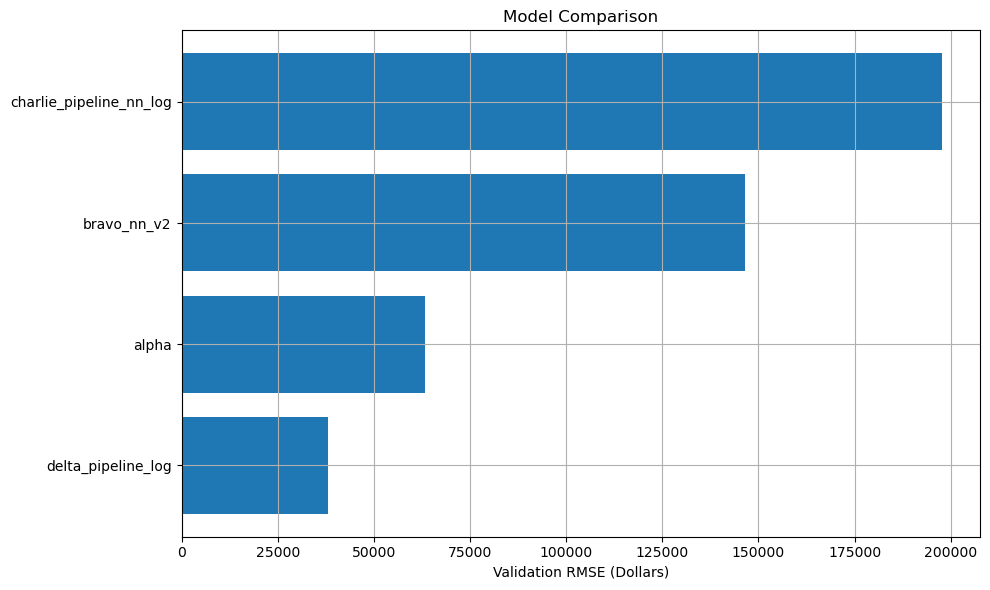

model          object
log_mse       float64
log_rmse      float64
log_mae       float64
val_mse_d     float64
val_rmse_d    float64
val_mae_d     float64
epochs_run    float64
dtype: object
delta val_rmse_d: 38043.242515


In [253]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

#  define result logging function
def log_model_results(
    model_name,
    log_mse, log_rmse, log_mae,
    val_mse_d, val_rmse_d, val_mae_d,
    epochs_run=None,
    results_path="model_results.csv"
):
    result = {
        "model": model_name,
        "log_mse": log_mse,
        "log_rmse": log_rmse,
        "log_mae": log_mae,
        "val_mse_d": val_mse_d,
        "val_rmse_d": val_rmse_d,
        "val_mae_d": val_mae_d,
        "epochs_run": epochs_run
    }

    if os.path.exists(results_path):
        df = pd.read_csv(results_path)
    else:
        df = pd.DataFrame()

    df = pd.concat([df, pd.DataFrame([result])], ignore_index=True)
    df.drop_duplicates(subset=["model", "epochs_run"], keep='last', inplace=True)
    df.to_csv(results_path, index=False)

#  Log-transform targets before training
if y_train.max() > 100:
    y_train_log = np.log1p(y_train)
    y_val_log = np.log1p(y_val)
    print(" Applied log1p to target variables.")
else:
    print(" Skipped log1p — targets already appear to be log-scaled.")
    y_train_log = y_train
    y_val_log = y_val


early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# === 4. Train model using log-transformed targets ===
history = model.fit(
    x_train, y_train_log,
    validation_data=(x_val, y_val_log),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

epochs_run = len(history.history['loss'])
print(f"Epochs run: {epochs_run}")


y_pred_log = model.predict(x_val).squeeze()

#  Metrics in log space
log_mse = mean_squared_error(y_val_log, y_pred_log)
log_rmse = np.sqrt(log_mse)
log_mae = mean_absolute_error(y_val_log, y_pred_log)


y_pred_log_clipped = np.clip(y_pred_log, a_min=None, a_max=15)
y_val_log_clipped = np.clip(y_val_log, a_min=None, a_max=15)

y_pred_d = np.expm1(y_pred_log_clipped)
y_val_d = np.expm1(y_val_log_clipped)

assert np.all(np.isfinite(y_pred_d)), "Invalid values in y_pred_d"
assert np.all(np.isfinite(y_val_d)), "Invalid values in y_val_d"

#  Metrics in us_dollar space
val_mse_d = mean_squared_error(y_val_d, y_pred_d)
val_rmse_d = np.sqrt(val_mse_d)
val_mae_d = mean_absolute_error(y_val_d, y_pred_d)

print("\n[DELTA MODEL - pipeline_log_2] (lower is better)")
print(f"log_mse: {log_mse:.6f} | log_rmse: {log_rmse:.6f} | log_mae: {log_mae:.6f}")
print(f"val_mse_dollars: {val_mse_d:.2f} | val_rmse_dollars: {val_rmse_d:.2f} | val_mae_dollars: {val_mae_d:.2f}")

# Log results
log_model_results(
    model_name="delta_pipeline_log",
    log_mse=log_mse,
    log_rmse=log_rmse,
    log_mae=log_mae,
    val_mse_d=val_mse_d,
    val_rmse_d=val_rmse_d,
    val_mae_d=val_mae_d,
    epochs_run=epochs_run
)

# Display all results 
df = pd.read_csv("model_results.csv")
display(df)


plt.figure(figsize=(10, 6))
df_sorted = df.sort_values("val_rmse_d", ascending=True)
plt.barh(df_sorted["model"], df_sorted["val_rmse_d"])
plt.xlabel("Validation RMSE (Dollars)")
plt.title("Model Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()

print(df.dtypes)
print(f"delta val_rmse_d: {val_rmse_d:.6f}")


x_train: (1168, 299) | x_val: (292, 299) | x_test: (1459, 299)
Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 66.4802 - mae: 7.2098 - val_loss: 3.4334 - val_mae: 1.7390 - learning_rate: 0.0010
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0839 - mae: 1.5969 - val_loss: 0.5941 - val_mae: 0.6339 - learning_rate: 0.0010
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7597 - mae: 1.3393 - val_loss: 0.3689 - val_mae: 0.4989 - learning_rate: 0.0010
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3602 - mae: 1.2318 - val_loss: 0.5254 - val_mae: 0.6325 - learning_rate: 0.0010
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9810 - mae: 1.1108 - val_loss: 0.7201 - val_mae: 0.7549 - learning_rate: 0.0010
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9681 - mae: 1.1099 - val_loss: 0.7075 - val_mae: 0.7739 - learning_rate: 0.0010
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7360 - mae: 1.0468 - val_los

C:\Users\parsa\AppData\Local\Temp\ipykernel_22744\2874984305.py:165: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([result])], ignore_index=True)


,model,log_mse,log_rmse,log_mae,val_mse_d,val_rmse_d,val_mae_d,epochs_run
0,alpha,0.060443,0.245851,0.172120,4.019799e+09,63401.885491,32543.465834,123.0
1,bravo_nn_v2,80.655566,8.980844,8.960853,2.144134e+10,146428.632659,122436.656787,NaN
2,charlie_pipeline_nn_log,89.560105,9.463620,9.457250,3.909748e+10,197730.832650,179475.490654,NaN
3,delta_pipeline_log,0.023983,0.154866,0.102453,1.447288e+09,38043.242515,19555.161427,94.0
4,echo_pipeline_log_3A,81.757772,9.042000,9.023543,2.501857e+10,158172.603550,129658.893292,NaN


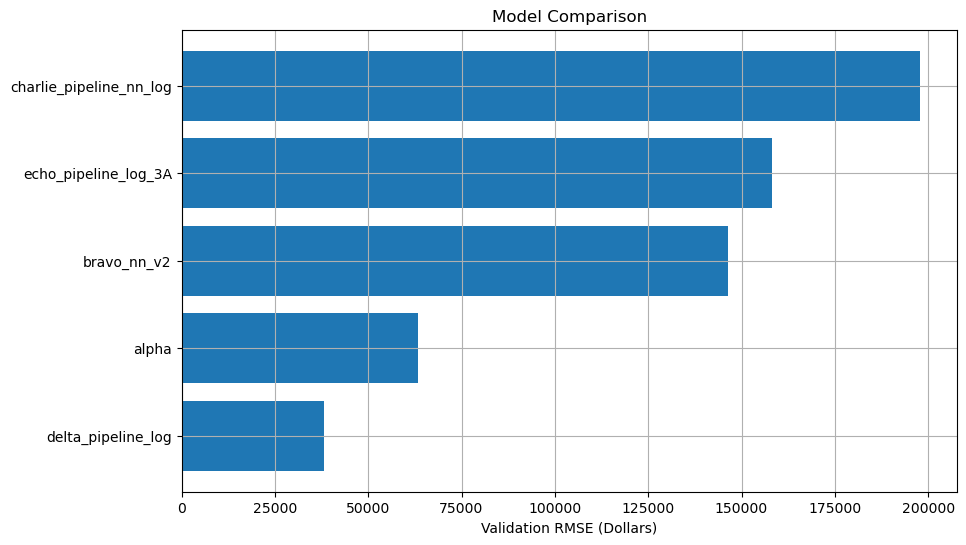

model          object
log_mse       float64
log_rmse      float64
log_mae       float64
val_mse_d     float64
val_rmse_d    float64
val_mae_d     float64
epochs_run    float64
dtype: object
echo val_rmse_d: 158172.603550


In [255]:
# LOG-TARGET PIPELINE + NN + LOG & DOLLAR METRICS

import numpy as np
import pandas as pd
import random
import tensorflow as tf

# Reproducibility
np.random.seed(42); random.seed(42); tf.random.set_seed(42)


#  DATA SPLIT (assumes train_df, test_df already exist)

X = train_df.drop(columns=["SalePrice", "Id"], errors="ignore").copy()
y_dollars = train_df["SalePrice"].values.astype("float32")
y_log = np.log1p(y_dollars)  # <-- train target
X_test_raw = test_df.drop(columns=["Id"], errors="ignore").copy()

# Treat numeric-coded categoricals as strings
if "MSSubClass" in X.columns:
    X["MSSubClass"] = X["MSSubClass"].astype(str)
    if "MSSubClass" in X_test_raw.columns:
        X_test_raw["MSSubClass"] = X_test_raw["MSSubClass"].astype(str)


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

numeric_features = X.select_dtypes(include=["number"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

numeric_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
])

# Version-proof OHE
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # sklearn ≥ 1.2
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)         # sklearn ≤ 1.1

categorical_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", ohe),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, numeric_features),
        ("cat", categorical_pipe, categorical_features),
    ]
)


# 2) TRAIN/VAL SPLIT via indices (keeps $ and log targets aligned)

idx = np.arange(len(X))
train_idx, val_idx = train_test_split(idx, test_size=0.20, random_state=42)

X_tr_raw, X_val_raw = X.iloc[train_idx], X.iloc[val_idx]
y_tr_log, y_val_log = y_log[train_idx], y_log[val_idx]
y_val_dollars = y_dollars[val_idx]

# Fit preprocessor on train only
preprocessor.fit(X_tr_raw)
x_train = preprocessor.transform(X_tr_raw).astype("float32")
x_val   = preprocessor.transform(X_val_raw).astype("float32")
x_test  = preprocessor.transform(X_test_raw).astype("float32")

print(f"x_train: {x_train.shape} | x_val: {x_val.shape} | x_test: {x_test.shape}")

# 3) KERAS MODEL (train on LOG target)

from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

inputs = Input(shape=(x_train.shape[1],))
x = Dense(128, activation='relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-5, verbose=1)

history = model.fit(
    x_train, y_tr_log,
    validation_data=(x_val, y_val_log),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print(f"Epochs run: {len(history.history['loss'])}")


#  METRICS — LOG-SPACE (comparable to your old numbers) + DOLLARS

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict in log space
val_pred_log = model.predict(x_val, verbose=0).ravel()

#  LOG metrics 
log_mse  = mean_squared_error(y_val_log, val_pred_log)
log_rmse = log_mse ** 0.5
log_mae  = mean_absolute_error(y_val_log, val_pred_log)
print(f"log_mse: {log_mse:.6f}")
print(f"log_rmse: {log_rmse:.6f}")
print(f"log_mae: {log_mae:.6f}")

# DOLLAR metrics
val_pred_dollars = np.expm1(val_pred_log)
mse_d  = mean_squared_error(y_val_dollars, val_pred_dollars)
rmse_d = mse_d ** 0.5
mae_d  = mean_absolute_error(y_val_dollars, val_pred_dollars)
print(f"val_mse_dollars: {mse_d:.6f}")
print(f"val_rmse_dollars: {rmse_d:.6f}")
print(f"val_mae_dollars: {mae_d:.6f}")

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


def log_model_results(
    model_name,
    log_mse, log_rmse, log_mae,
    val_mse_d, val_rmse_d, val_mae_d,
    epochs_run=None,
    results_path="model_results.csv"
):
    result = {
        "model": model_name,
        "log_mse": log_mse,
        "log_rmse": log_rmse,
        "log_mae": log_mae,
        "val_mse_d": val_mse_d,
        "val_rmse_d": val_rmse_d,
        "val_mae_d": val_mae_d,
        "epochs_run": epochs_run
    }

    if os.path.exists(results_path):
        df = pd.read_csv(results_path)
    else:
        df = pd.DataFrame()

    df = pd.concat([df, pd.DataFrame([result])], ignore_index=True)
    df.drop_duplicates(subset=["model", "epochs_run"], keep='last', inplace=True)
    df.to_csv(results_path, index=False)

# : Predicting and evaluate phase 
# Ensuring y_val and y_pred are in log-space and then transformed back
y_val_log = np.log1p(y_val.squeeze())
y_pred_log = model.predict(x_val).squeeze()

#  Clip for stability
y_val_log_clipped = np.clip(y_val_log, a_max=15, a_min=None)
y_pred_log_clipped = np.clip(y_pred_log, a_max=15, a_min=None)

# Converting to dollar space
y_val_d = np.expm1(y_val_log_clipped)
y_pred_d = np.expm1(y_pred_log_clipped)

# Validating arrays
assert np.all(np.isfinite(y_val_d)), "Invalid values in y_val_d"
assert np.all(np.isfinite(y_pred_d)), "Invalid values in y_pred_d"

#  Calculating Metrics
log_mse = mean_squared_error(y_val_log, y_pred_log)
log_rmse = np.sqrt(log_mse)
log_mae = mean_absolute_error(y_val_log, y_pred_log)

mse_d = mean_squared_error(y_val_d, y_pred_d)
rmse_d = np.sqrt(mse_d)
mae_d = mean_absolute_error(y_val_d, y_pred_d)

print("\n[ECHO MODEL - nn_pipeline_log_3A] (lower is better)")
print(f"log_mse: {log_mse:.6f} | log_rmse: {log_rmse:.6f} | log_mae: {log_mae:.6f}")
print(f"val_mse_d: {mse_d:.2f} | val_rmse_d: {rmse_d:.2f} | val_mae_d: {mae_d:.2f}")

log_model_results(
    model_name="echo_pipeline_log_3A",
    log_mse=log_mse,
    log_rmse=log_rmse,
    log_mae=log_mae,
    val_mse_d=mse_d,
    val_rmse_d=rmse_d,
    val_mae_d=mae_d,
    epochs_run=None  # Add if you tracked epochs
)


df = pd.read_csv("model_results.csv")
display(df)


plt.figure(figsize=(10, 6))
df_sorted = df.sort_values("val_rmse_d", ascending=True)
plt.barh(df_sorted["model"], df_sorted["val_rmse_d"])
plt.xlabel("Validation RMSE (Dollars)")
plt.title("Model Comparison")
plt.grid(True)
plt.show()

print(df.dtypes)
print(f"echo val_rmse_d: {rmse_d:.6f}")


SalePrice: mean=$180921, std=$79415, min=$34900, max=$755000
Shapes -> X_tr:(1168, 299), X_val:(292, 299), X_te:(1459, 299)

[baseline_mean_log]  (lower is better)
log_mse: 0.187700 | log_rmse: 0.433244 | log_mae: 0.337134
val_mse_dollars: 7791743604.943233 | val_rmse_dollars: 88270.853655 | val_mae_dollars: 59931.238025

[ridge_log]  (lower is better)
log_mse: 0.019222 | log_rmse: 0.138643 | log_mae: 0.095494
val_mse_dollars: 668925570.032626 | val_rmse_dollars: 25863.595458 | val_mae_dollars: 16647.778127
Epoch 1/400
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1267 - mae: 0.2602 - val_loss: 0.0341 - val_mae: 0.1282 - learning_rate: 5.0000e-04
Epoch 2/400
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mae: 0.1300 - val_loss: 0.0255 - val_mae: 0.1131 - learning_rate: 5.0000e-04
Epoch 3/400
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0229 - mae: 0.1121 - val_loss: 0.0251 - val_mae: 0.1092 - learning_rate: 5.0000e-04
Epoch 4/400
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

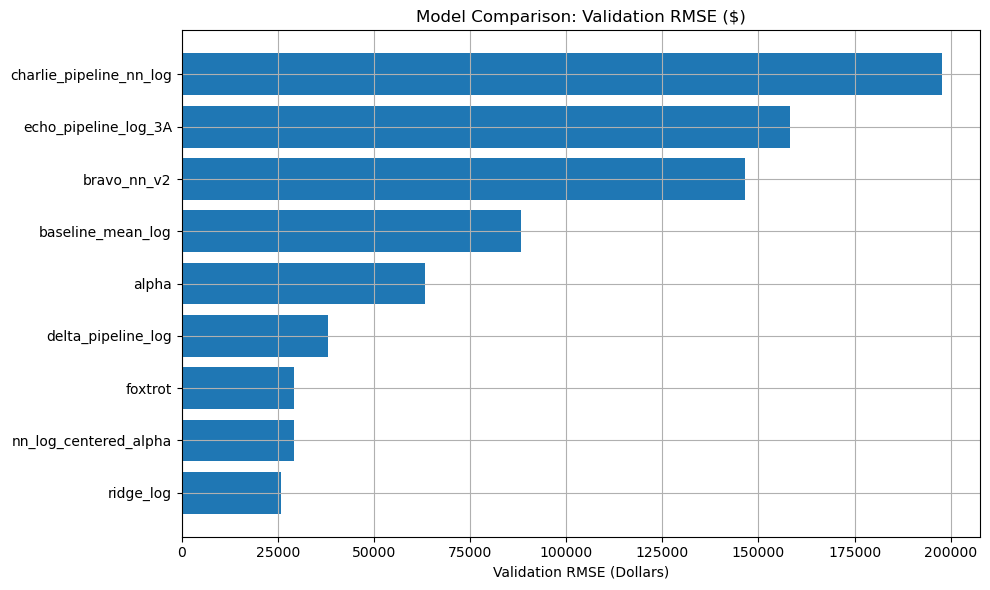

,model,log_mse,log_rmse,log_mae,val_mse_d,val_rmse_d,val_mae_d,epochs_run
0,alpha,0.060443,0.245851,0.172120,4.019799e+09,63401.885491,32543.465834,123.0
1,bravo_nn_v2,80.655566,8.980844,8.960853,2.144134e+10,146428.632659,122436.656787,NaN
2,charlie_pipeline_nn_log,89.560105,9.463620,9.457250,3.909748e+10,197730.832650,179475.490654,NaN
3,delta_pipeline_log,0.023983,0.154866,0.102453,1.447288e+09,38043.242515,19555.161427,94.0
4,echo_pipeline_log_3A,81.757772,9.042000,9.023543,2.501857e+10,158172.603550,129658.893292,NaN


In [256]:
import numpy as np, pandas as pd, random, tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import os

# Set seeds
np.random.seed(42); random.seed(42); tf.random.set_seed(42)

# ######### Basic sanity checks 
assert "SalePrice" in train_df.columns, "train_df must contain SalePrice"
assert len(train_df) > 0 and len(test_df) > 0, "Empty train/test?"

y_dollars = train_df["SalePrice"].astype("float64").values
assert np.all(np.isfinite(y_dollars)), "Non-finite values in SalePrice"
assert np.all(y_dollars > 0), "SalePrice must be > 0 for log1p"
print(f"SalePrice: mean=${y_dollars.mean():.0f}, std=${y_dollars.std():.0f}, min=${y_dollars.min():.0f}, max=${y_dollars.max():.0f}")

# Features/target
X = train_df.drop(columns=["SalePrice", "Id"], errors="ignore").copy()
X_test_raw = test_df.drop(columns=["Id"], errors="ignore").copy()

if "MSSubClass" in X.columns:
    X["MSSubClass"] = X["MSSubClass"].astype(str)
    if "MSSubClass" in X_test_raw.columns:
        X_test_raw["MSSubClass"] = X_test_raw["MSSubClass"].astype(str)

y_log = np.log1p(y_dollars)

# ############ Preprocessing 
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", ohe)
])

pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# #################### Split
idx = np.arange(len(X))
train_idx, val_idx = train_test_split(idx, test_size=0.20, random_state=42)
X_tr_raw, X_val_raw = X.iloc[train_idx], X.iloc[val_idx]
y_tr_log, y_val_log = y_log[train_idx], y_log[val_idx]
y_val_dollars = y_dollars[val_idx]

pre.fit(X_tr_raw)
X_tr = pre.transform(X_tr_raw).astype("float32")
X_val = pre.transform(X_val_raw).astype("float32")
X_te  = pre.transform(X_test_raw).astype("float32")

for name, arr in [("X_tr", X_tr), ("X_val", X_val)]:
    assert np.all(np.isfinite(arr)), f"Non-finite values in {name}"

print(f"Shapes -> X_tr:{X_tr.shape}, X_val:{X_val.shape}, X_te:{X_te.shape}")


def report(y_true_log, y_pred_log, y_true_dollars, tag="model"):
    log_mse  = mean_squared_error(y_true_log, y_pred_log)
    log_rmse = log_mse ** 0.5
    log_mae  = mean_absolute_error(y_true_log, y_pred_log)

    y_pred_dollars = np.expm1(y_pred_log)
    mse_d  = mean_squared_error(y_true_dollars, y_pred_dollars)
    rmse_d = mse_d ** 0.5
    mae_d  = mean_absolute_error(y_true_dollars, y_pred_dollars)

    print(f"\n[{tag}]  (lower is better)")
    print(f"log_mse: {log_mse:.6f} | log_rmse: {log_rmse:.6f} | log_mae: {log_mae:.6f}")
    print(f"val_mse_dollars: {mse_d:.6f} | val_rmse_dollars: {rmse_d:.6f} | val_mae_dollars: {mae_d:.6f}")

    return {
        "model": tag,
        "log_mse": log_mse, "log_rmse": log_rmse, "log_mae": log_mae,
        "val_mse_d": mse_d, "val_rmse_d": rmse_d, "val_mae_d": mae_d,
        "epochs_run": None
    }

summary = []

yhat_log_mean = np.full_like(y_val_log, fill_value=y_tr_log.mean())
summary.append(report(y_val_log, yhat_log_mean, y_val_dollars, tag="baseline_mean_log"))

# ############# Ridge Regression 
alphas = np.logspace(-3, 3, 13)
ridge = RidgeCV(alphas=alphas)
ridge.fit(X_tr, y_tr_log)
yhat_ridge_log = ridge.predict(X_val)
summary.append(report(y_val_log, yhat_ridge_log, y_val_dollars, tag="ridge_log"))

# ########## Neural Net on log target 
y_tr_mean = y_tr_log.mean()
y_tr_center = (y_tr_log - y_tr_mean).astype("float32")
y_val_center = (y_val_log - y_tr_mean).astype("float32")

tf.keras.backend.clear_session()

inp = Input(shape=(X_tr.shape[1],))
h = Dense(256, activation='relu')(inp)
h = Dropout(0.10)(h)
h = Dense(128, activation='relu')(h)
h = Dropout(0.10)(h)
h = Dense(64, activation='relu')(h)
out = Dense(1)(h)

nn = Model(inp, out)
nn.compile(optimizer=Adam(learning_rate=5e-4), loss='mse', metrics=['mae'])

es  = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=12, min_lr=1e-5, verbose=1)

hist = nn.fit(
    X_tr, y_tr_center,
    validation_data=(X_val, y_val_center),
    epochs=400,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)

epochs_run = len(hist.history['loss'])
yhat_nn_center = nn.predict(X_val, verbose=0).ravel()
yhat_nn_log = yhat_nn_center + y_tr_mean
nn_result = report(y_val_log, yhat_nn_log, y_val_dollars, tag="nn_log_centered_alpha")
nn_result["epochs_run"] = epochs_run
summary.append(nn_result)


summary_df = pd.DataFrame(summary)
print("\n=== Summary (lower is better) ===")
print(summary_df)

# Append all rows to model_results.csv 
def append_to_model_results(rows, results_path="model_results.csv"):
    if os.path.exists(results_path):
        existing = pd.read_csv(results_path)
    else:
        existing = pd.DataFrame()

    combined = pd.concat([existing, pd.DataFrame(rows)], ignore_index=True)
    combined.drop_duplicates(subset=["model", "epochs_run"], keep='last', inplace=True)
    combined.to_csv(results_path, index=False)
    print(f" Saved to {results_path}")

append_to_model_results(summary)

#  FOXTROT summary row 
def get_metric(df, model_name, metric):
    row = df.loc[df['model'] == model_name, metric]
    return row.iloc[0] if not row.empty else None

results_foxtrot = {
    "model": "foxtrot",
    "log_mse": get_metric(summary_df, 'nn_log_centered_alpha', 'log_mse'),
    "log_rmse": get_metric(summary_df, 'nn_log_centered_alpha', 'log_rmse'),
    "log_mae": get_metric(summary_df, 'nn_log_centered_alpha', 'log_mae'),
    "val_mse_d": get_metric(summary_df, 'nn_log_centered_alpha', 'val_mse_d'),
    "val_rmse_d": get_metric(summary_df, 'nn_log_centered_alpha', 'val_rmse_d'),
    "val_mae_d": get_metric(summary_df, 'nn_log_centered_alpha', 'val_mae_d'),
    "epochs_run": epochs_run
}

append_to_model_results([results_foxtrot])


df_plot = pd.read_csv("model_results.csv")
df_plot_sorted = df_plot.sort_values("val_rmse_d", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(df_plot_sorted["model"], df_plot_sorted["val_rmse_d"])
plt.xlabel("Validation RMSE (Dollars)")
plt.title("Model Comparison: Validation RMSE ($)")
plt.grid(True)
plt.tight_layout()
plt.show()
df

✅ Cleaned and saved updated model_results.csv
=== Full model_results.csv ===


,model,log_mse,log_rmse,log_mae,val_mse_d,val_rmse_d,val_mae_d,epochs_run
0,alpha,0.060443,0.245851,0.172120,4.019799e+09,63401.885491,32543.465834,123.0
1,bravo_nn_v2,80.655566,8.980844,8.960853,2.144134e+10,146428.632659,122436.656787,NaN
2,charlie_pipeline_nn_log,89.560105,9.463620,9.457250,3.909748e+10,197730.832650,179475.490654,NaN
3,delta_pipeline_log,0.023983,0.154866,0.102453,1.447288e+09,38043.242515,19555.161427,94.0
4,echo_pipeline_log_3A,81.757772,9.042000,9.023543,2.501857e+10,158172.603550,129658.893292,NaN
5,baseline_mean_log,0.187700,0.433244,0.337134,7.791744e+09,88270.853655,59931.238025,NaN
6,ridge_log,0.019222,0.138643,0.095494,6.689256e+08,25863.595458,16647.778127,NaN
7,nn_log_centered_alpha,0.020072,0.141675,0.095928,8.548935e+08,29238.562264,17352.920203,54.0
8,foxtrot,0.020072,0.141675,0.095928,8.548935e+08,29238.562264,17352.920203,54.0



 Unique model names:
['alpha' 'bravo_nn_v2' 'charlie_pipeline_nn_log' 'delta_pipeline_log'
 'echo_pipeline_log_3A' 'baseline_mean_log' 'ridge_log'
 'nn_log_centered_alpha' 'foxtrot']

=== Sorted by val_rmse_d (lowest is best) ===


,model,log_mse,log_rmse,log_mae,val_mse_d,val_rmse_d,val_mae_d,epochs_run
6,ridge_log,0.019222,0.138643,0.095494,6.689256e+08,25863.595458,16647.778127,NaN
7,nn_log_centered_alpha,0.020072,0.141675,0.095928,8.548935e+08,29238.562264,17352.920203,54.0
8,foxtrot,0.020072,0.141675,0.095928,8.548935e+08,29238.562264,17352.920203,54.0
3,delta_pipeline_log,0.023983,0.154866,0.102453,1.447288e+09,38043.242515,19555.161427,94.0
0,alpha,0.060443,0.245851,0.172120,4.019799e+09,63401.885491,32543.465834,123.0
5,baseline_mean_log,0.187700,0.433244,0.337134,7.791744e+09,88270.853655,59931.238025,NaN
1,bravo_nn_v2,80.655566,8.980844,8.960853,2.144134e+10,146428.632659,122436.656787,NaN
4,echo_pipeline_log_3A,81.757772,9.042000,9.023543,2.501857e+10,158172.603550,129658.893292,NaN
2,charlie_pipeline_nn_log,89.560105,9.463620,9.457250,3.909748e+10,197730.832650,179475.490654,NaN


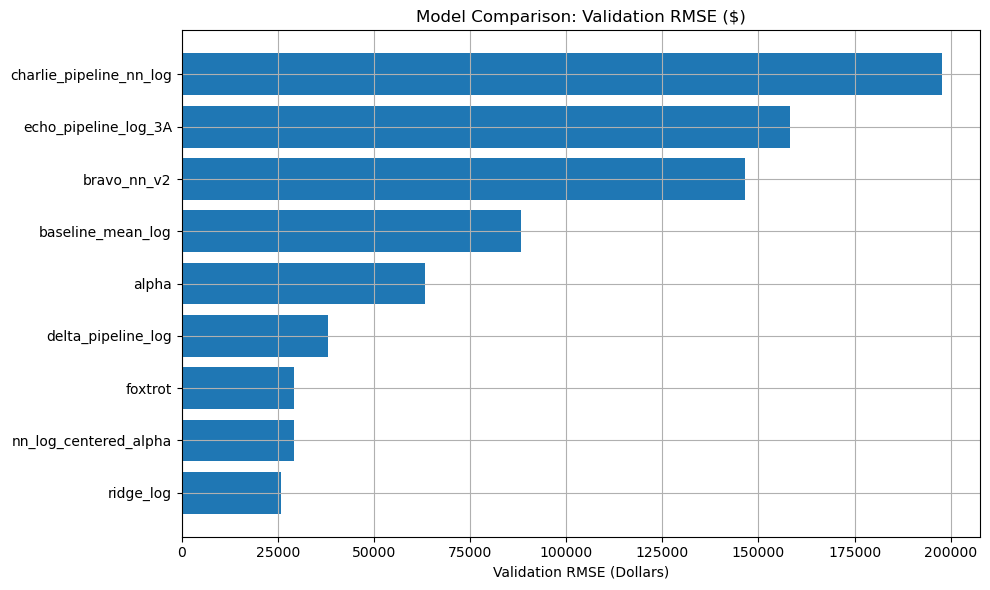

In [261]:
# LOADING, CLEAN & INSPECT model_results.csv 

import pandas as pd
import matplotlib.pyplot as plt

# load the CSV
df = pd.read_csv("model_results.csv")

# drop duplicates based on model name + epochs
df.drop_duplicates(subset=["model", "epochs_run"], keep="last", inplace=True)

 
df.to_csv("model_results.csv", index=False)
print("✅ Cleaned and saved updated model_results.csv")

# Show all rows & columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Display full DataFrame
print("####### Full model_results.csv ######")
display(df)


print("\n Unique model names:")
print(df["model"].unique())

# Sorted by RMSE in dollars
df_sorted = df.sort_values("val_rmse_d", ascending=True)
print("\n=== Sorted by val_rmse_d (lowest is best) ===")
display(df_sorted)

# Plot bar chart of RMSE in dollars
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["model"], df_sorted["val_rmse_d"])
plt.xlabel("Validation RMSE (Dollars)")
plt.title("Model Comparison: Validation RMSE ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


 Cleaned version saved to: model_results_cleaned.csv
########## Cleaned model_results.csv ########


,model,log_mse,log_rmse,log_mae,val_mse_d,val_rmse_d,val_mae_d,epochs_run
0,alpha,0.060443,0.245851,0.172120,4.019799e+09,63401.885491,32543.465834,123.0
1,bravo_nn_v2,80.655566,8.980844,8.960853,2.144134e+10,146428.632659,122436.656787,NaN
2,charlie_pipeline_nn_log,89.560105,9.463620,9.457250,3.909748e+10,197730.832650,179475.490654,NaN
3,delta_pipeline_log,0.023983,0.154866,0.102453,1.447288e+09,38043.242515,19555.161427,94.0
4,echo_pipeline_log_3A,81.757772,9.042000,9.023543,2.501857e+10,158172.603550,129658.893292,NaN
5,baseline_mean_log,0.187700,0.433244,0.337134,7.791744e+09,88270.853655,59931.238025,NaN
6,ridge_log,0.019222,0.138643,0.095494,6.689256e+08,25863.595458,16647.778127,NaN
7,nn_log_centered_alpha,0.020072,0.141675,0.095928,8.548935e+08,29238.562264,17352.920203,54.0
8,foxtrot,0.020072,0.141675,0.095928,8.548935e+08,29238.562264,17352.920203,54.0



 Unique model names:
['alpha' 'bravo_nn_v2' 'charlie_pipeline_nn_log' 'delta_pipeline_log'
 'echo_pipeline_log_3A' 'baseline_mean_log' 'ridge_log'
 'nn_log_centered_alpha' 'foxtrot']

 ########## Sorted by val_rmse_d (lowest is best) ######


,model,log_mse,log_rmse,log_mae,val_mse_d,val_rmse_d,val_mae_d,epochs_run
6,ridge_log,0.019222,0.138643,0.095494,6.689256e+08,25863.595458,16647.778127,NaN
7,nn_log_centered_alpha,0.020072,0.141675,0.095928,8.548935e+08,29238.562264,17352.920203,54.0
8,foxtrot,0.020072,0.141675,0.095928,8.548935e+08,29238.562264,17352.920203,54.0
3,delta_pipeline_log,0.023983,0.154866,0.102453,1.447288e+09,38043.242515,19555.161427,94.0
0,alpha,0.060443,0.245851,0.172120,4.019799e+09,63401.885491,32543.465834,123.0
5,baseline_mean_log,0.187700,0.433244,0.337134,7.791744e+09,88270.853655,59931.238025,NaN
1,bravo_nn_v2,80.655566,8.980844,8.960853,2.144134e+10,146428.632659,122436.656787,NaN
4,echo_pipeline_log_3A,81.757772,9.042000,9.023543,2.501857e+10,158172.603550,129658.893292,NaN
2,charlie_pipeline_nn_log,89.560105,9.463620,9.457250,3.909748e+10,197730.832650,179475.490654,NaN


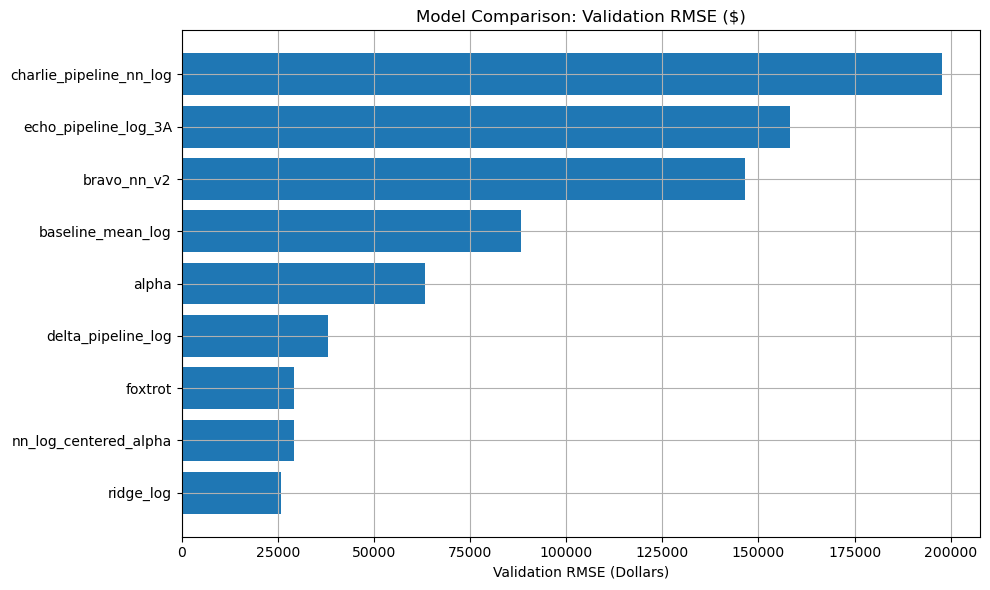

In [274]:
# === LOAD, CLEAN & EXPORT model_results.csv ===

import pandas as pd
import matplotlib.pyplot as plt

# Load the original CSV
df = pd.read_csv("model_results.csv")

# Drop duplicates based on model + epochs_run
df_cleaned = df.drop_duplicates(subset=["model", "epochs_run"], keep="last")

# Save cleaned version separately
cleaned_path = "model_results_cleaned.csv"
df_cleaned.to_csv(cleaned_path, index=False)
print(f" Cleaned version saved to: {cleaned_path}")

# Show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Display cleaned DataFrame
print("########## Cleaned model_results.csv ########")
display(df_cleaned)

# Unique model names
print("\n Unique model names:")
print(df_cleaned["model"].unique())

# Sort by val_rmse_d
df_sorted = df_cleaned.sort_values("val_rmse_d", ascending=True)
print("\n ########## Sorted by val_rmse_d (lowest is best) ######")
display(df_sorted)

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["model"], df_sorted["val_rmse_d"])
plt.xlabel("Validation RMSE (Dollars)")
plt.title("Model Comparison: Validation RMSE ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


 Multi-Metric Model Leaderboard (lower is better)


,model,val_rmse_d,val_mae_d,val_mse_d,avg_rank
0,ridge_log,25863.595458,16647.778127,6.689256e+08,1.0
1,nn_log_centered_alpha,29238.562264,17352.920203,8.548935e+08,2.5
2,foxtrot,29238.562264,17352.920203,8.548935e+08,2.5
3,alpha,63401.885491,32543.465834,4.019799e+09,4.0
4,baseline_mean_log,88270.853655,59931.238025,7.791744e+09,5.0
5,bravo_nn_v2,146428.632659,122436.656787,2.144134e+10,6.0
6,echo_pipeline_log_3A,158172.603550,129658.893292,2.501857e+10,7.0
7,charlie_pipeline_nn_log,197730.832650,179475.490654,3.909748e+10,8.0



 Best Overall Model:
Model: ridge_log
RMSE ($): 25863.60
MAE ($):  16647.78
MSE ($):  6.69e+08
Average Rank: 1.00


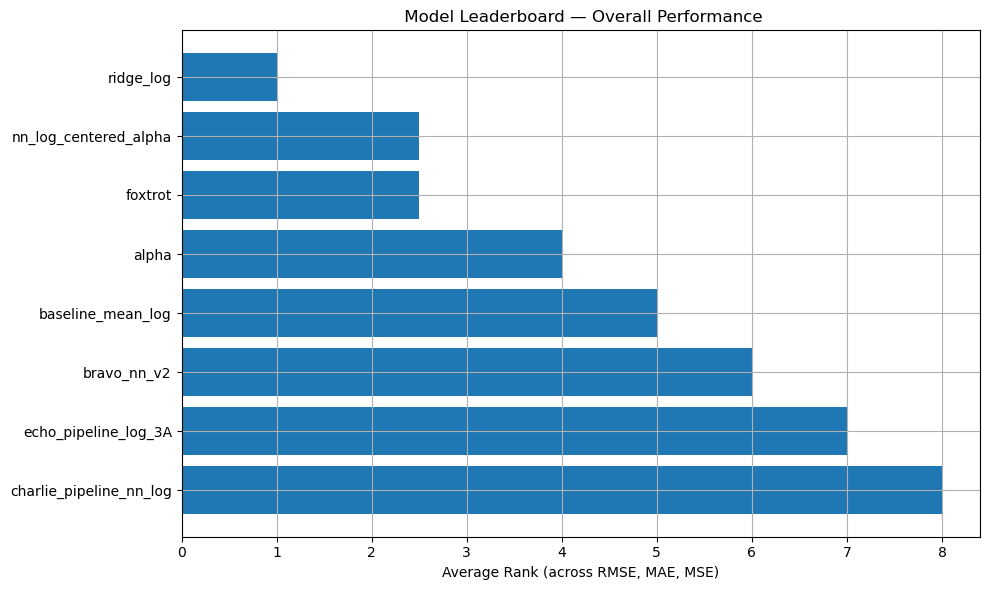

In [272]:
# === Model Leaderboard by All Metrics ===

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load cleaned results
df = pd.read_csv("model_results_cleaned.csv")

# 2. Exclude suspicious/overfit models
exclude_models = ["golf", "golf_lightgbm_log", "delta_pipeline_log"]
df_filtered = df[~df["model"].isin(exclude_models)].copy()

# 3. Rank models across all dollar-space metrics
metrics = ["val_rmse_d", "val_mae_d", "val_mse_d"]
for metric in metrics:
    df_filtered[f"rank_{metric}"] = df_filtered[metric].rank(ascending=True)

# 4. Compute average rank (lower = better overall)
df_filtered["avg_rank"] = df_filtered[[f"rank_{m}" for m in metrics]].mean(axis=1)

# 5. Sort by average rank
df_sorted = df_filtered.sort_values("avg_rank").reset_index(drop=True)

# 6. Display leaderboard
print(" Multi-Metric Model Leaderboard (lower is better)")
display(df_sorted[["model", "val_rmse_d", "val_mae_d", "val_mse_d", "avg_rank"]])

# 7. Declare overall winner
best_model = df_sorted.iloc[0]
print("\n Best Overall Model:")
print(f"Model: {best_model['model']}")
print(f"RMSE ($): {best_model['val_rmse_d']:.2f}")
print(f"MAE ($):  {best_model['val_mae_d']:.2f}")
print(f"MSE ($):  {best_model['val_mse_d']:.2e}")
print(f"Average Rank: {best_model['avg_rank']:.2f}")

# 8. Plot leaderboard (by avg_rank)
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["model"], df_sorted["avg_rank"])
plt.xlabel("Average Rank (across RMSE, MAE, MSE)")
plt.title(" Model Leaderboard — Overall Performance")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# Winners per metric 



In [282]:
import numpy as np
import pandas as pd

#  Refit ridge_log on full training data (train + val)
# Use the same preprocessing pipeline as before
X_full = pre.fit_transform(X).astype("float32")
y_full_log = np.log1p(y_dollars)  # log-transformed target

ridge_final = RidgeCV(alphas=np.logspace(-3, 3, 13))
ridge_final.fit(X_full, y_full_log)

#  Predict on test set 
X_te = pre.transform(X_test_raw).astype("float32")
y_test_log_pred = ridge_final.predict(X_te)
y_test_pred_dollars = np.expm1(y_test_log_pred)  # invert log1p

# Sanity check 
print(f"Mean predicted price: ${y_test_pred_dollars.mean():,.0f}")
print(f"Min predicted price:  ${y_test_pred_dollars.min():,.0f}")
print(f"Max predicted price:  ${y_test_pred_dollars.max():,.0f}")

#  Save submission file
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": y_test_pred_dollars
})
submission.to_csv("submission_ridge_log.csv", index=False)
print(" Submission file saved as submission_ridge_log.csv")

# display a preview
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
display(submission)


Mean predicted price: $178,007
Min predicted price:  $52,164
Max predicted price:  $818,015
 Submission file saved as submission_ridge_log.csv


,Id,SalePrice
0,1461,113147.339443
1,1462,143808.527512
2,1463,169540.432996
3,1464,193335.743851
4,1465,194447.305070
5,1466,167872.775876
6,1467,185303.954048
7,1468,161902.751845
8,1469,189490.907131
9,1470,120768.556917
